In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from scipy import stats
from scipy.stats import multivariate_normal

import seaborn as sns; sns.set()
np.random.seed(42)

In [2]:
class genere_distributions():
    x_min, x_max = 0., 1.
    y_min, y_max = 0., 1.
    nx, ny = 60, 60

    def __init__(self, mu, sigma, angle, xc, yc):
        self.mu = mu
        self.sigma = sigma
        self.angle = angle
        self.xc = xc
        self.yc = yc
        
        self.genere_grid()
        self.genere_pdfs()


    def genere_grid(self):
        self.x = np.linspace(self.x_min, self.x_max, self.nx)
        self.y = np.linspace(self.y_min, self.y_max, self.ny)
        self.xx, self.yy = np.meshgrid(self.x,self.y) 
        self.pos = np.dstack((self.xx, self.yy))
        


    # Modèles génératifs pour les distributions normales 2D 
    # (PDF: probability distribution functions)
    def genere_pdfs(self):

        # Matrice de rotation
        theta = np.radians(self.angle)
        c, s = np.cos(theta), np.sin(theta)
        R = np.array(((c, -s), (s, c)))        

        # Matrice de covariance avant rotation
        C = np.array([[self.sigma[0]**2, 0.],[0., self.sigma[1]**2]])

        # Matrice de covariance après rotation
        # new_cov = rotation_matrix @ cov @ rotation_matrix.T
        self.C = R.dot( C.dot(R.T) )  

        # Génère modèle pour PDF normale 2D
        modele = multivariate_normal(self.mu, self.C) 
        self.pdf = modele.pdf(self.pos)

        # Distribution 1D  p(x)
        self.pdf_x = multivariate_normal.pdf(self.x, mean=self.mu[0], cov=self.C[0,0])

        # Distribution 1D  p(y)
        self.pdf_y = multivariate_normal.pdf(self.y, mean=self.mu[1], cov=self.C[1,1])

        # Distribution 1D  p(y|x=xc)
        P = np.empty([self.ny,2])
        P[:,0] = self.xc
        P[:,1] = self.y
        self.pdf_xc = multivariate_normal.pdf(P, mean=self.mu, cov=self.C)

        # Distribution 1D  p(x|y=yc)
        P = np.empty([self.nx,2])
        P[:,0] = self.x
        P[:,1] = self.yc
        self.pdf_yc = multivariate_normal.pdf(P, mean=self.mu, cov=self.C)
        

    # Affiche les différentes pdf
    def affiche_PDF_avec_contours(self, nom_figure=None):

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(13,13))
        
        # Affichage de p(x,y)
        cset = ax1.contourf(self.xx, self.yy, self.pdf, zdir='z', cmap=cm.viridis, levels=7)
        ax1.plot([self.x_min, self.x_max], [self.yc, self.yc], linewidth=2.0, color='red')
        ax1.text(0.79, 0.72,'$x_{2} = 0.7$', fontsize=16, color='white')
        ax1.plot([self.xc, self.xc], [self.y_min, self.y_max], linewidth=2.0, color='green')
        ax1.text(0.31, 0.02,'$x_{1} = 0.3$', fontsize=16, color='white')
        ax1.set_xlabel('$x_{1}$',fontsize=18)
        ax1.set_ylabel('$x_{2}$',rotation=0,fontsize=18)
        ax1.xaxis.set_label_coords(0.5, -0.08)
        ax1.yaxis.set_label_coords(-0.08, 0.5)

        # Affichage de p(y|x=xc)
        ax2.plot(self.pdf_y, self.y, label='$p(x_{2})$', linewidth=3.0, color='black')
        ax2.plot(self.pdf_xc, self.y, label='$p(x_{2}|x_{1}=0.3)$', linewidth=2.0, color='green')
        ax2.set_ylabel('$x_{2}$',rotation=0,fontsize=18)
        ax2.set_xlabel('Probabilité',fontsize=18)
        ax2.xaxis.set_label_coords(0.5, -0.08)
        ax2.yaxis.set_label_coords(-0.08, 0.5)
        ax2.legend(loc='best',fontsize=14)

        # Affichage de p(x|y=yc)
        ax3.plot(self.x, self.pdf_x, label='$p(x_{1})$', linewidth=3.0, color='black')
        ax3.plot(self.x, self.pdf_yc, label='$p(x_{1}|x_{2}=0.7)$', linewidth=2.0, color='red')
        ax3.set_xlabel('$x_{1}$',fontsize=18)
        ax3.set_ylabel('Probabilité',fontsize=18)
        ax3.xaxis.set_label_coords(0.5, -0.08)
        ax3.yaxis.set_label_coords(-0.08, 0.5)
        ax3.legend(loc='best',fontsize=14)

        # Masque panneau non utilisé
        ax4.axis('off')

        # Sauvegarde de l'image 
        if nom_figure!=None:
            plt.savefig(nom_figure, format="svg")
            
        plt.show()


C:\Users\pgsci\anaconda3\lib\site-packages\ipykernel_launcher.py:70: UserWarning: The following kwargs were not used by contour: 'zdir'


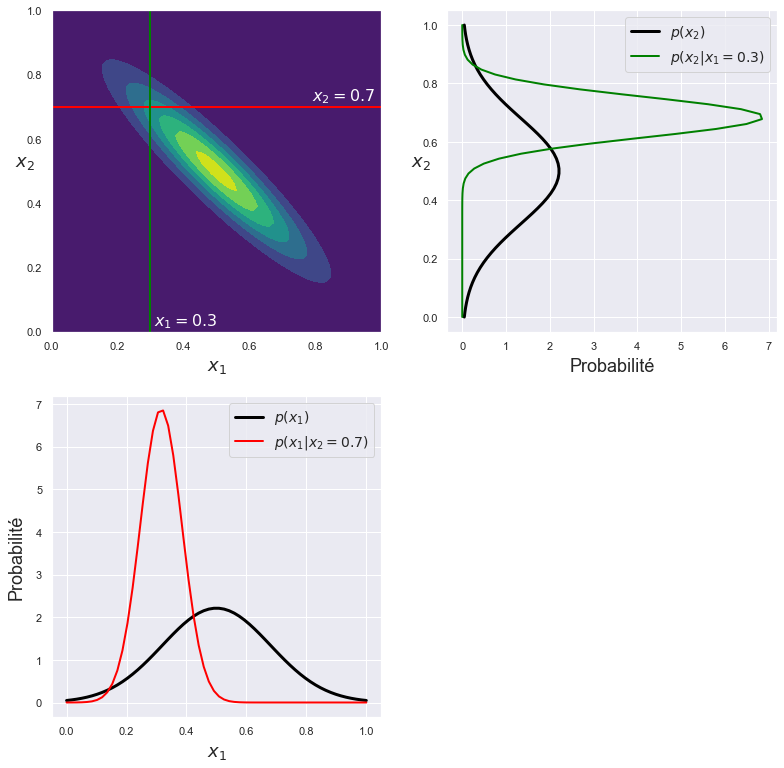

In [3]:
# Définition de la fonction de distribution des probabilités (PDF en anglais). On utilise une distribution normale 2D.

# ------- Paramètres de la gaussienne --------
mu = np.array([0.5, 0.5])
sigma = np.array([0.25, 0.05])
angle = -45. 

# Coordonnées des coupes horizontale et verticale
xc = 0.3
yc = 0.7

# ----------- Génération des distributions --------------
pdfs = genere_distributions(mu, sigma, angle, xc, yc)


# -----------Affichage des distributions ---------
nom_figure = "Figure_12_41.svg"
pdfs.affiche_PDF_avec_contours(nom_figure=nom_figure)
